In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML

CSS = """
div.cell:nth-child(35) .output {
    flex-direction: row;
}
"""

HTML('<style>{}</style>'.format(CSS))

In [14]:
pd.options.mode.chained_assignment = None

In [15]:
df = pd.read_csv('../data/labelled_save.csv', low_memory=False, index_col=0)

In [16]:
df

,abstract,PMID,year,journal,title,author,prof,blood,dosage,clean_abstracts,significant
0,quality life hypoparathyroidism vokes author i...,30261328,2018.0,Bone,Quality of life in hypoparathyroidism,VokesT,VokesT,0.0,0.0,Hypoparathyroidism is a rare endocrine disorde...,no
1,vitamind status and its association with seaso...,30261231,2018.0,Neurosci Lett,Vitamin D status and its association with seas...,GuY ZhuZ LuanX HeJ,HeJ,1.0,0.0,BACKGROUND: Vitamin D plays a key role in depr...,yes
2,vitamind levels active tuberculosis latent tub...,30260729,2018.0,Fetal Pediatr Pathol,Vitamin D Levels in Active TB Latent TB Non-TB...,BuonsensoD SaliM PataD MasielloE SalernoG Cecc...,ValentiniP,0.0,0.0,BACKGROUND: Growing evidence suggests that vit...,yes
3,correlation vitamind binding protein gene poly...,30259785,2018.0,Per Med,Correlation of vitamin D binding protein gene ...,ChuaychooB TungtrongchitrR KriengsinyosW Tunti...,ChupeerachC,0.0,0.0,AIM: The risk of vitamin D binding protein (DB...,both
4,vitamind status including epicalcitriol among ...,30259504,2018.0,Endokrynol Pol,Vitamin D status including 3-epi-25OHD3 among ...,KmieP MinkiewiczI SworczakK mijewskiMA KowalskiK,KowalskiK,1.0,0.0,INTRODUCTION: In the context of pleiotropic vi...,yes
5,novel biomarker signatures for idiopathic rem ...,30258025,2018.0,Neurology,Novel biomarker signatures for idiopathic REM ...,MondelloS KobeissyF MechrefY ZhaoJ TalihFR Cos...,FerriR,0.0,0.0,OBJECTIVE: To perform a rigorous in-depth prot...,yes
6,astemizole promotes the antitumor effect vitam...,30257386,2018.0,Biomed Pharmacother,Astemizole promotes the anti-tumor effect of v...,XuJ WangY ZhangY DangS HeS,HeS,0.0,0.0,Hepatocellular carcinoma (HCC) accounts for th...,yes
7,effects vitamind supplementation epigenetic ag...,30256915,2018.0,J Gerontol A Biol Sci Med Sci,Effects of Vitamin D3 supplementation on epige...,ChenL DongY BhagatwalaJ RaedA HuangY ZhuH,ZhuH,1.0,1.0,Background: We have previously shown that vita...,yes
8,randomized controlled pilot study the effects ...,30256811,2018.0,PLoS One,A randomized controlled pilot study of the eff...,HillerAL MurchisonCF LobbBM O'ConnorS O'Connor...,QuinnJF,1.0,1.0,"OBJECTIVES: To explore if short term, high dos...",both
9,nutrient patterns and risk breast cancer among...,30256069,2018.0,Asian Pac J Cancer Prev,Nutrient Patterns and Risk of Breast Cancer am...,FereidaniSS Eini-ZinabH HeidariZ JalaliS Sedag...,RashidkhaniB,0.0,0.0,Objective: To explore the role of nutrient pat...,yes


### Number of publications over the years

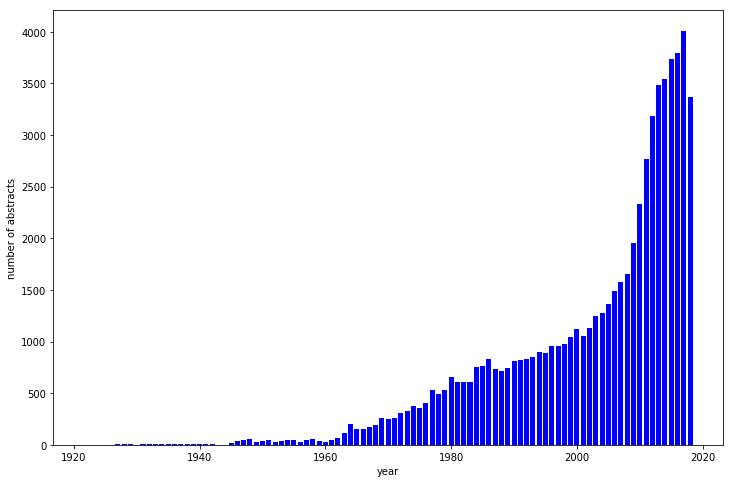

In [17]:
abstracts_year = df.groupby('year').count().reset_index()
plt.figure(figsize=(12,8))
plt.bar(abstracts_year['year'], abstracts_year['abstract'], color='b')
plt.xlabel('year')
plt.ylabel('number of abstracts')
plt.show()

The amount of publications on the subject of vitamin D. The interest has continously inscread sinde the 60s and basically exploded at around 2010.

### Length of abstracts

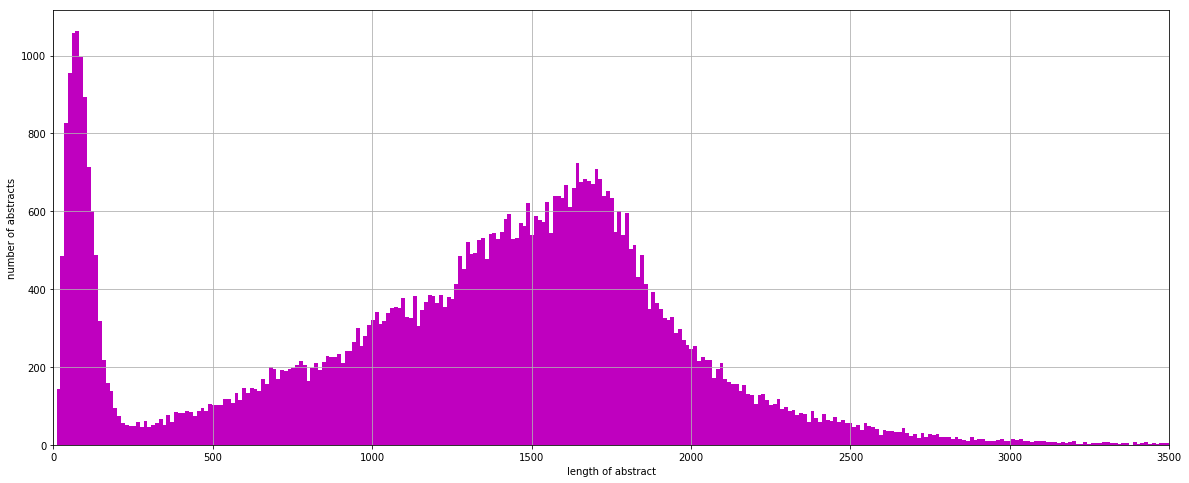

In [18]:
len_abstracts = df.clean_abstracts.str.len()

plt.figure(figsize=(20,8))
len_abstracts.hist(bins=1000, color='m')
plt.xlim(0,3500)
plt.xlabel('length of abstract')
plt.ylabel('number of abstracts')
plt.show()

There is an unexpected peak in the beginning. This due to the fact that very old abstracts are only indexed for reference and do not contain text.

In [19]:
df_len_abstracts = pd.DataFrame()
df_len_abstracts['year'] = df.year
df_len_abstracts['len'] = len_abstracts

In [20]:
year_len = pd.DataFrame(df_len_abstracts.groupby('year')['len'].mean())

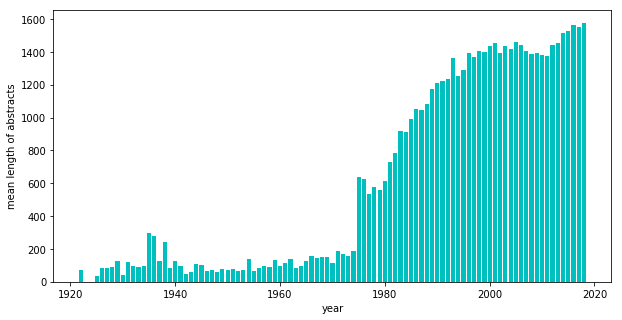

In [21]:
plt.figure(figsize=(10,5))
plt.bar(year_len.index, year_len['len'], color='c')
plt.xlabel('year')
plt.ylabel('mean length of abstracts')
plt.show()

At around 1975 abstracts are not just indexed but actually contain text.

### Length distribution of PMID

In [22]:
df['PMID'] = df.PMID.apply(lambda x: str(x))

len_PMID = pd.DataFrame()
len_PMID['abstract'] = df.abstract
len_PMID['len'] = df.PMID.str.len()

len_PMID_group = len_PMID.groupby('len').count().reset_index()

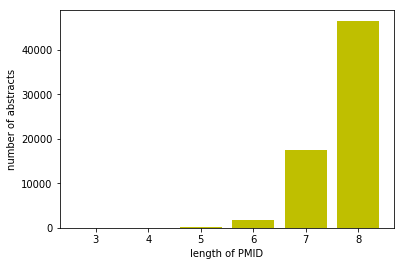

In [23]:
plt.bar(len_PMID_group['len'], len_PMID_group['abstract'], color='y')
plt.xlabel('length of PMID')
plt.ylabel('number of abstracts')
plt.show()

The PMID legnth ranges between 3 and 8 digits. Most abstracts have a PMID with a length of 8 digits.

### Is there a relationship between year of publication and length of PMID?
E.g. was the PMID shorter in the beginning?

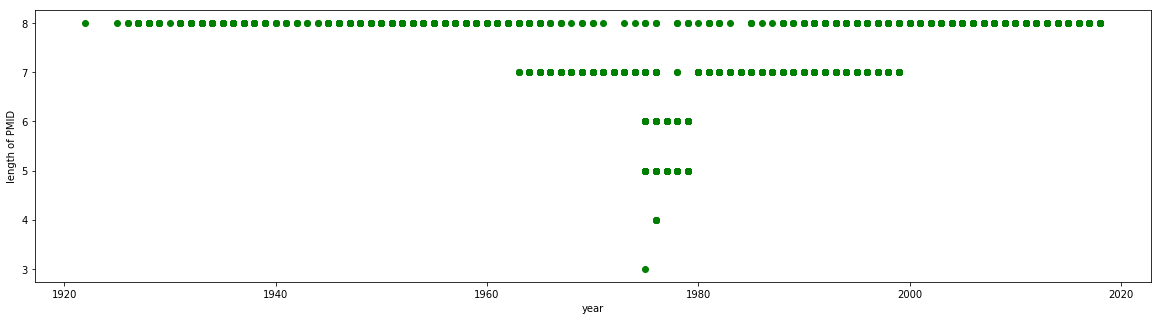

In [24]:
plt.figure(figsize=(20,5))
plt.scatter(df['year'],len_PMID.len, c='g')
plt.xlabel('year')
plt.ylabel('length of PMID')
plt.show()

There is no relationship between length of PMID and year of publication. Most abstracts have a PMID of 8 digits, and those abstracts are equally spaced between the years.

### Does the number of authors increase with time?

In [25]:
number_authors = df[df['author'].str.contains('NaN|(no authors listed)') == False]

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


In [26]:
number_authors['author_count'] = number_authors.author.str.count(' ')

In [27]:
number_authors['author_count'] = number_authors['author_count'].apply(lambda x: x + 1)

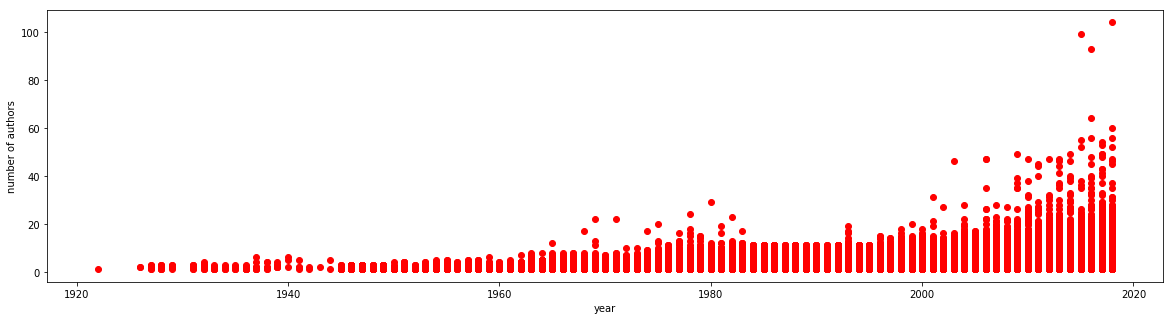

In [28]:
plt.figure(figsize=(20,5))
plt.scatter(number_authors['year'], number_authors['author_count'], color='r')
plt.xlabel('year')
plt.ylabel('number of authors')
plt.show()

The number of author a publication has gradually increased over the years. This is expected, since sience is becoming ever more complicated.

### Top 15 Journals

In [5]:
journal = df.groupby('journal').count().sort_values('abstract', ascending=False).iloc[:15,:1]
journal

,abstract
journal,
J Clin Endocrinol Metab,1109
J Steroid Biochem Mol Biol,1083
J Bone Miner Res,889
Endocrinology,803
PLoS One,790
Calcif Tissue Int,727
Osteoporos Int,714
J Biol Chem,629
Am J Clin Nutr,607


### Who are the vitamin D experts?
For determining the experts, the last author (usually the professor) is used.

In [29]:
df['prof'] = df.prof.str.replace('.', ' ', regex=False)
df['prof'] = df.prof.str.strip()

In [30]:
df_clean = df[df.prof.str.contains('etal') == False]
signi = df_clean[df_clean.significant.str.contains('0.0') == False]
no_signi = df_clean[df_clean.significant.str.contains('0.0') == True]

In [31]:
prof_all = df_clean.groupby('prof').count().sort_values('abstract', ascending=False)
prof_signi = signi.groupby('prof').count().sort_values('abstract', ascending=False)
prof_no_signi = no_signi.groupby('prof').count().sort_values('abstract', ascending=False)

#### The top 10 experts are:

In [32]:
display(prof_all.iloc[:10,:1])
display(prof_signi.iloc[:10,:1])
display(prof_no_signi.iloc[:10,:1])

,abstract
prof,
DeLucaHF,587
NormanAW,301
HolickMF,247
FeldmanD,127
BouillonR,111
SudaT,110
KumarR,103
HausslerMR,96
CarlbergC,96


,abstract
prof,
DeLucaHF,91
HolickMF,57
NormanAW,50
FeldmanD,36
SlatopolskyE,32
PakCY,31
AsemiZ,30
HollisBW,30
ReidIR,29


,abstract
prof,
DeLucaHF,496
NormanAW,251
HolickMF,190
SudaT,94
FeldmanD,91
BouillonR,83
KumarR,81
CarlbergC,75
StudzinskiGP,72


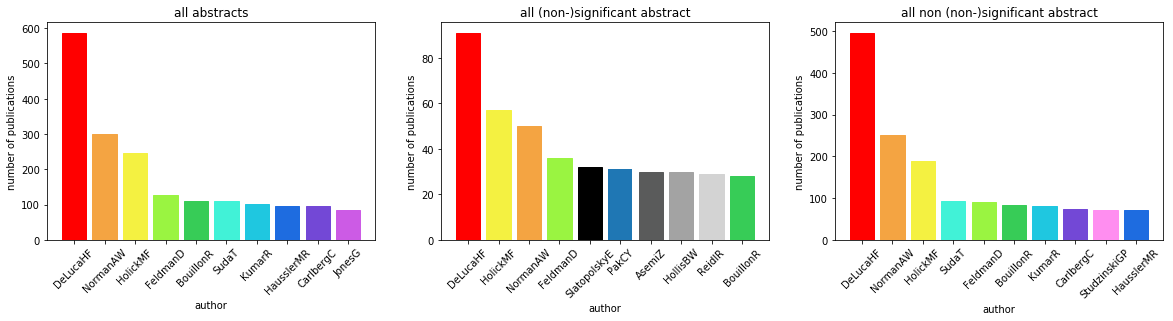

In [10]:
plt.figure(figsize=(20,4))

plt.subplot(1,3,1)
x1 = plt.bar(prof_all.index[:10], prof_all['abstract'][:10])
x1[0].set_color('r')
x1[1].set_color('#f4a442')
x1[2].set_color('#f4f141')
x1[3].set_color('#9af441')
x1[4].set_color('#37cc57')
x1[5].set_color('#41f2d7')
x1[6].set_color('#1fc7e0')
x1[7].set_color('#1e6ce0')
x1[8].set_color('#7348d6')
x1[9].set_color('#cc5be5')
plt.title('all abstracts')
plt.xlabel('author')
plt.ylabel('number of publications')
plt.xticks(rotation=45)

plt.subplot(1,3,2)
x2= plt.bar(prof_signi.index[:10], prof_signi['abstract'][:10])
x2[0].set_color('r')
x2[1].set_color('#f4f141')
x2[2].set_color('#f4a442')
x2[3].set_color('#9af441')
x2[4].set_color('k')
x2[6].set_color('#5a5b5b')
x2[7].set_color('#a3a3a3')
x2[8].set_color('#d3d3d3')
x2[9].set_color('#37cc57')
plt.title('all (non-)significant abstract')
plt.xlabel('author')
plt.ylabel('number of publications')
plt.xticks(rotation=45)

plt.subplot(1,3,3)
x3 = plt.bar(prof_no_signi.index[:10], prof_no_signi['abstract'][:10])
x3[0].set_color('r')
x3[1].set_color('#f4a442')
x3[2].set_color('#f4f141')
x3[3].set_color('#41f2d7')
x3[4].set_color('#9af441')
x3[5].set_color('#37cc57')
x3[6].set_color('#1fc7e0')
x3[7].set_color('#7348d6')
x3[8].set_color('#ff8ef0')
x3[9].set_color('#1e6ce0')
plt.title('all non (non-)significant abstract')
plt.xlabel('author')
plt.ylabel('number of publications')
plt.xticks(rotation=45)

plt.show()

### Who are the most proliferent authors?
- the last authors are removed (usually the professor)
- the top 10 vitamin D experts are removed

In [33]:
no_prof = df.author.str.rsplit(' ', n=1).str.get(0)

In [34]:
authors_only = pd.DataFrame()
authors_only['authors'] = no_prof
authors_only['authors'] = authors_only.authors.str.replace('DeLucaHF|NormanAW|HolickMF|FeldmanD|BouillonR|KumarR|\
SudaT|CarlbergC|JonesG|HausslerMR', 'None', regex=True)
single_authors = authors_only.authors.str.split(' ', expand=True)

In [35]:
authors = pd.DataFrame()

for column in range(single_authors.shape[1]):
    authors = pd.concat((authors,single_authors[column]), axis=0)

In [36]:
authors = authors[authors[0].str.contains('None') == False]

In [37]:
authors['count'] = np.zeros((len(authors),1))

In [38]:
prolif_author = authors.groupby(0).count().sort_values('count',ascending=False)[:10]
prolif_author

,count
0,
HollisBW,209
HorstRL,163
WangX,149
BikleDD,146
GrantWB,141
WangY,141
WangJ,131
ZhangY,131
ChenTC,124


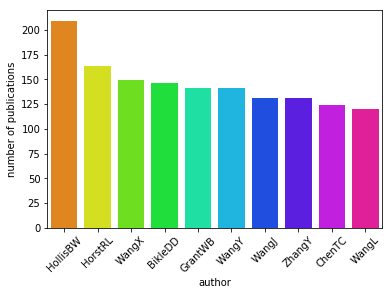

In [39]:
sns.barplot(prolif_author.index, y = prolif_author['count'], data = prolif_author, palette='hsv')
plt.xlabel('author')
plt.ylabel('number of publications')
plt.xticks(rotation=45)
plt.show()

### In which journals do the experts prefer to publish?

In [40]:
prof_10 = df[df.prof.str.contains('DeLucaHF|NormanAW|HolickMF|FeldmanD|BouillonR|KumarR|SudaT|CarlbergC|JonesG\
|HausslerMR') == True]

In [41]:
prof_10_journal = prof_10.groupby('journal').count().sort_values('abstract', ascending=False).iloc[:15,:1]
prof_10_journal['Top 15 Journal'] = np.zeros((len(prof_10_journal),1))

In [42]:
same = 0

for entry in range(len(journal.index)):
    if prof_10_journal.index[entry] in journal.index:
        same += 1
    prof_10_journal.loc[prof_10_journal.index[entry], 'Top 15 Journal'] = prof_10_journal.index[entry] in journal.index

In [43]:
prof_10_journal

,abstract,Top 15 Journal
journal,,
J Biol Chem,128,True
Arch Biochem Biophys,115,False
Endocrinology,96,True
Biochem Biophys Res Commun,84,True
Proc Natl Acad Sci U S A,76,False
J Steroid Biochem Mol Biol,65,True
Biochemistry,58,False
J Bone Miner Res,51,True
J Clin Endocrinol Metab,42,True


In [44]:
print(f'Number of journals that are preferred by the experts and are also on the Top 15 journal list: {same}')

Number of journals that are preferred by the experts and are also on the Top 15 journal list: 7


### Is there a relationship between number of authors and journal
E.g. Nature is known for its ridiculously long author lists

In [45]:
author_journal = pd.DataFrame()
author_journal['abstract'] = df['abstract']
author_journal['journal'] = df['journal']
author_journal['author_count'] = number_authors['author_count']

In [46]:
author_journal.sort_values('author_count', ascending=False).iloc[:15,:]

,abstract,journal,author_count
1260,genomewide association study europeanancestry ...,Nat Commun,104.0
31124,conversion from clinically isolated syndrome t...,Mult Scler,99.0
27583,french law: what about a reasoned reimbursemen...,Geriatr Psychol Neuropsychiatr Vieil,93.0
28896,genetic evidence for causal relationships betw...,JAMA,64.0
25116,transethnic evaluation identifies low-frequenc...,J Clin Endocrinol Metab,60.0
488,circulating vitamind and colorectal cancer ris...,J Natl Cancer Inst,56.0
4906,cypa variant modifies the association between ...,Br J Cancer,56.0
30486,correction: vitamin d metabolic pathway genes ...,PLoS One,55.0
26631,circulating concentrations of biomarkers and m...,Am J Clin Nutr,54.0
26032,low-frequency synonymous coding variation in c...,Am J Hum Genet,53.0


Top 15 of abstracts with most authors.

In [47]:
aj_median = pd.DataFrame(author_journal.groupby('journal')['author_count'].median())

In [48]:
median_authors = aj_median.sort_values('author_count', ascending=False).iloc[:50,:]

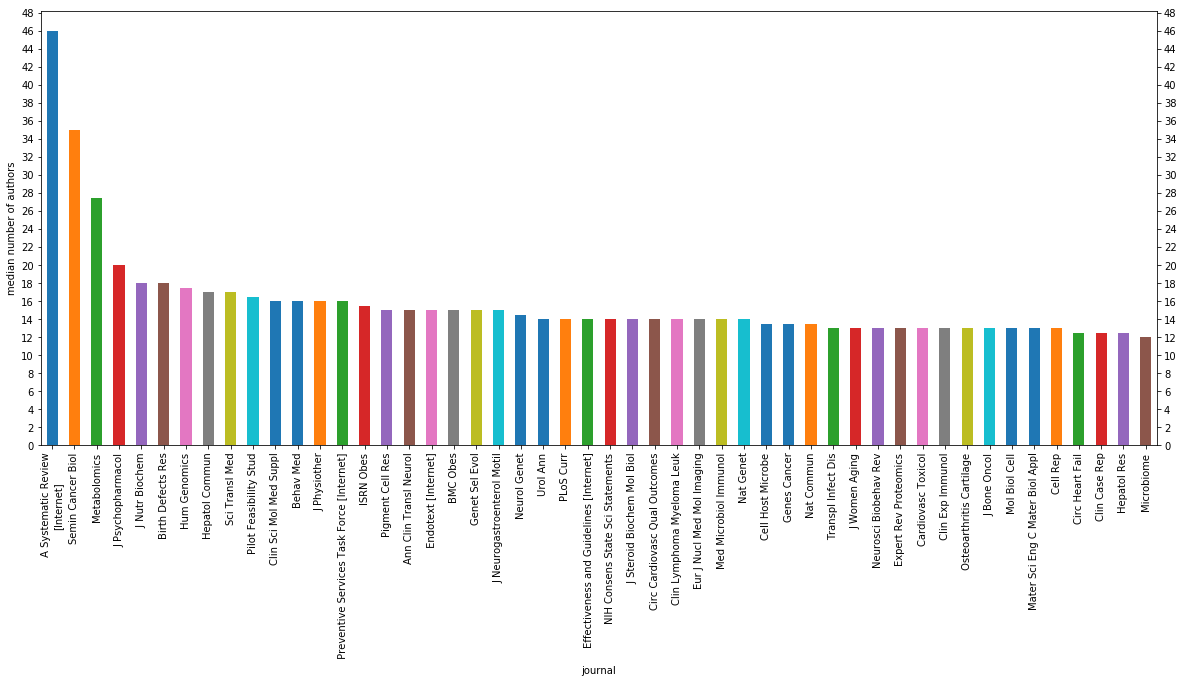

In [49]:
plt.figure(figsize=(20,8))
median_authors['author_count'].plot.bar()
plt.ylabel('median number of authors')
plt.yticks(np.arange(0,50,2))
plt.tick_params(labelright=True, right=True)
plt.show()

Maximum median of authors are 46 authors (A Systematic Review).

### Are abstracts with a vitamin D dose more likely to report of (non-)significant results?

In [50]:
dosage_signi = pd.DataFrame(df.groupby(['dosage','significant']).count().iloc[:,0])

In [51]:
percent = []

for entry in range(int(len(dosage_signi)/2)):
    count = int(len(dosage_signi)/2)
    percent.append(np.round((dosage_signi.iloc[entry,0]/(dosage_signi.iloc[0:4,0].sum()) * 100),1))

for entry in range(int(len(dosage_signi)/2)):
    count = entry + int(len(dosage_signi)/2)
    percent.append(np.round((dosage_signi.iloc[count,0]/(dosage_signi.iloc[4:8,0].sum()) * 100),1))

In [52]:
dosage_signi['%'] = percent

In [53]:
dosage_signi

abstract     %
dosage significant                
0.0    0.0             40425  65.4
       both             3683   6.0
       no               2865   4.6
       yes             14821  24.0
1.0    0.0              1931  44.9
       both              590  13.7
       no                400   9.3
       yes              1382  32.1

Abstracts with a vitamin D doses are more likely to report (non-)significant results.

### Are abstracts with vitamin D blood serum measurement more likely to report of (non-)significant results?

In [54]:
blood_signi = pd.DataFrame(df.groupby(['blood','significant']).count().iloc[:,0])

In [55]:
percent = []
start = 0
end = 4

for entry in range(len(blood_signi)):
    if (entry % 4 == 0 and entry > 0):
        start += 4
        end += 4
    percent.append(np.round(blood_signi.iloc[entry,0]/blood_signi.iloc[start:end,0].sum() * 100,1))

In [56]:
blood_signi['%'] = percent

In [57]:
blood_signi

abstract     %
blood significant                
0.0   0.0             39645  66.3
      both             3485   5.8
      no               2802   4.7
      yes             13832  23.1
1.0   0.0              2711  42.8
      both              788  12.4
      no                463   7.3
      yes              2371  37.4

Abstracts with a vitamin D blood serum measurement are more likely to report (non-)significant results.

### How often is a blood serum measurement taken after vitamin D administration?

In [58]:
dose_blood = pd.DataFrame(df.groupby(['dosage','blood']).count().iloc[:,0])

In [59]:
percent = []
start = 0
end = 2

for entry in range(len(dose_blood)):
    if (entry % 2 == 0 and entry > 0):
        start += 2
        end += 2
    percent.append(np.round(dose_blood.iloc[entry,0]/dose_blood.iloc[start:end,0].sum() * 100,1))

In [60]:
dose_blood['%'] = percent

In [61]:
dose_blood[2:4]

abstract     %
dosage blood                
1.0    0.0        3177  73.8
       1.0        1126  26.2

Only in 26 % of all cases is a vitamin D blood serum measurement taken after vitamin D administration. That is a rather low number, considering that every human takes a different dose to reach a certain serum level. This might make results non-significant, even though they would be if they would have checked if the dose had the desired effect on serum level.

### Does the comibination of serum level measurement after dosage administration result in more positive significant results?

In [62]:
dose_blood_signi = pd.DataFrame(df.groupby(['dosage','blood', 'significant']).count().iloc[:,0])

In [63]:
percent = []
start = 0
end = 4

for entry in range(len(dose_blood_signi)):
    if (entry % 4 == 0 and entry > 0):
        start += 4
        end += 4
    percent.append(np.round(dose_blood_signi.iloc[entry,0]/dose_blood_signi.iloc[start:end,0].sum() * 100,1))

In [64]:
dose_blood_signi['%'] = percent

In [65]:
dose_blood_signi

abstract     %
dosage blood significant                
0.0    0.0   0.0             38169  67.5
             both             3066   5.4
             no               2522   4.5
             yes             12830  22.7
       1.0   0.0              2256  43.3
             both              617  11.8
             no                343   6.6
             yes              1991  38.2
1.0    0.0   0.0              1476  46.5
             both              419  13.2
             no                280   8.8
             yes              1002  31.5
       1.0   0.0               455  40.4
             both              171  15.2
             no                120  10.7
             yes               380  33.7

If blood serum is checked after dose administration, results are more likely to be (non-)significant, however, they are not more likely to report positive significance compared to a missing blood serum measurement. If just the blood serum level is measured, abstracts are even more likely to reporte a positive significance.